In [2]:
import json

In [3]:
# load json file to extend the node info
with open("../data/aggregated_data.json") as jr:
    cve_json = json.load(jr)



In [18]:
order = 0
for key, value in cve_json.items():
    while order >= 10:
        print(key)
        print(value)
        order += 1
        

In [15]:
list(cve_json.keys())[:20]

['org.jenkins-ci.main:cli:1.591',
 'org.elasticsearch:elasticsearch-hadoop:2.2.0-beta1',
 'org.jvnet.hudson.main:hudson-core:1.128',
 'net.sourceforge.htmlunit:neko-htmlunit:2.47.0',
 'org.jenkins-ci.main:cli:1.592',
 'org.jvnet.hudson.main:hudson-core:1.129',
 'net.sourceforge.htmlunit:neko-htmlunit:2.47.1',
 'org.springframework.boot:spring-boot-actuator:1.2.6.RELEASE',
 'org.jenkins-ci.main:cli:1.593',
 'org.jenkins-ci.main:cli:1.594',
 'org.jvnet.hudson.main:hudson-core:1.124',
 'org.xwiki.rendering:xwiki-rendering-syntax-xhtml:7.3-milestone-1',
 'org.jvnet.hudson.main:hudson-core:1.125',
 'org.jvnet.hudson.main:hudson-core:1.126',
 'org.jenkins-ci.main:cli:1.590',
 'org.jvnet.hudson.main:hudson-core:1.127',
 'org.jvnet.hudson.main:hudson-core:1.120',
 'org.jvnet.hudson.main:hudson-core:1.121',
 'org.jvnet.hudson.main:hudson-core:1.122',
 'org.jvnet.hudson.main:hudson-core:1.123']

In [12]:
len(list(cve_json.keys()))

97054

# Statistical Analysis Results

In [31]:
# define the mapping dict of ecosystem to packages
eco_dict = {
    "Maven": ["springframework", "jenkins-ci", 'apache', "sourceforge","craftercms",
              "wso2", "jvnet","puppycrawl","liferay","elasticsearch","undertow","graphql-java",
             "djl", "erudika"],
    "NPM": ["vue", "npm", "angular", "react"],
    "Ruby": ["rubygems"],
    "Pypi":["python"],
    
}

def eco_match(eco_dict, release_name):
    ''' match packages/releases to ecosystem
    :param eco_dict: the mapping dict to match release to its ecosystem
    :param release_name: the release name to match
    :return ecosystem name
    
    '''
    for key, values in eco_dict.items():
        for value in values:
            if value in release_name:
                return key
        # no match
    # print("there is no matched ecosystem for: ", release_name)
    # print("return default ecosystem")
    return "Maven"
    
    
    

In [32]:
release_list = list(cve_json.keys())
eco_system_dict = {}
eco_system = []
for key in key_list:
    res = eco_match(eco_dict, key)
    eco_system.append(res)
    if release not in eco_system_dict:
        eco_system_dict[release] = res


In [37]:
eco_cves_dict = {
    "Maven":[],
    "NPM":[],
    "Ruby":[],
    "Pypi":[],
}

for release, cves in cve_json.items():
    eco_cves_dict[eco_system_dict[release]].append(len(cves))
    
    

In [40]:
# calculate the mean CVEs for diverse ecosystems
from collections import Counter
import statistics

print(Counter(eco_system))
for eco, cve_len_list in eco_cves_dict.items():
    mean_num = statistics.mean(cve_len_list)
    print("The mean number of existing CVEs in ecosystem {} is: {}".format(eco, max_num))



Counter({'Maven': 95551, 'NPM': 1314, 'Ruby': 148, 'Pypi': 41})
The mean number of existing CVEs in ecosystem Maven is: 2
The mean number of existing CVEs in ecosystem NPM is: 2
The mean number of existing CVEs in ecosystem Ruby is: 2
The mean number of existing CVEs in ecosystem Pypi is: 2


In [38]:
# calculate the highest number of CVEs for diverse ecosystems
for eco, cve_len_list in eco_cves_dict.items():
    max_num = max(cve_len_list)
    print("The max number of existing CVEs in ecosystem {} is: {}".format(eco, max_num))


The max number of existing CVEs in ecosystem Maven is: 176
The max number of existing CVEs in ecosystem NPM is: 8
The max number of existing CVEs in ecosystem Ruby is: 7
The max number of existing CVEs in ecosystem Pypi is: 2


In [39]:
# calculate the median number of CVEs for diverse ecocystems
for eco, cve_len_list in eco_cves_dict.items():
    median_num = statistics.median(cve_len_list)
    print("The median number of existing CVEs in ecosystem {} is: {}".format(eco, median_num))


The median number of existing CVEs in ecosystem Maven is: 1
The median number of existing CVEs in ecosystem NPM is: 1.0
The median number of existing CVEs in ecosystem Ruby is: 6.0
The median number of existing CVEs in ecosystem Pypi is: 1


In [41]:
# visualize the statistic data in one chart
mean_cves = {
"Maven":2, "NPM":2, "Ruby":2, "Pypi":2
}

max_cves = {
"Maven": 176, "NPM": 8, "Ruby": 7, "Pypi": 2
}

med_cves= {
"Maven":1, "NPM":1, "Ruby":6, "Pypi":1
}

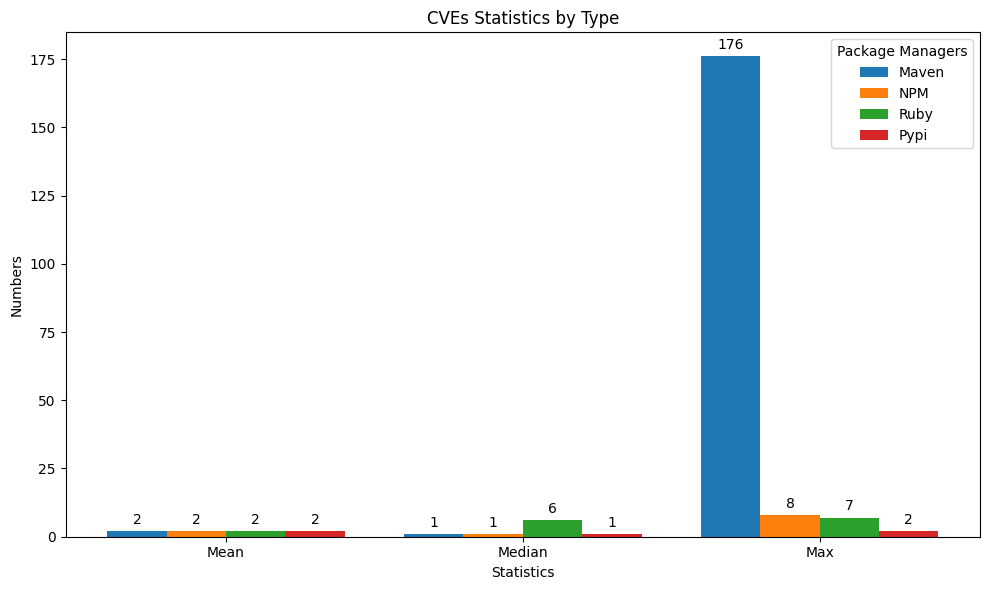

In [42]:
import matplotlib.pyplot as plt
import numpy as np

# Combine the data for plotting
categories = list(mean_cves.keys())
x_labels = ['Mean', 'Median', 'Max']
data = {
    'Maven': [mean_cves['Maven'], med_cves['Maven'], max_cves['Maven']],
    'NPM': [mean_cves['NPM'], med_cves['NPM'], max_cves['NPM']],
    'Ruby': [mean_cves['Ruby'], med_cves['Ruby'], max_cves['Ruby']],
    'Pypi': [mean_cves['Pypi'], med_cves['Pypi'], max_cves['Pypi']]
}

# Create a bar chart
bar_width = 0.2
x = np.arange(len(x_labels))  # the label locations

fig, ax = plt.subplots(figsize=(10, 6))

# Plotting each set of data
for i, (label, values) in enumerate(data.items()):
    ax.bar(x + i * bar_width, values, bar_width, label=label)

# Adding labels and title
ax.set_xlabel('Statistics')
ax.set_ylabel('Numbers')
ax.set_title('CVEs Statistics by Type')
ax.set_xticks(x + bar_width * 1.5)  # Centering the x ticks
ax.set_xticklabels(x_labels)
ax.legend(title='Package Managers')

# Adding bar labels
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Add labels for each set of bars
for i in range(len(data)):
    add_labels(ax.patches[i * len(x_labels):(i + 1) * len(x_labels)])

plt.tight_layout()
plt.show()

# check cves families with cwes

- one cve can potentially map to multiple cwes, cwe can be used to identify cves belong to same families

- we explore the following questions:

  - how many groups / families exist in this dataset
  - whether the same group of cves tend to infect similar software or diverse software, what is the relationships between specific familiy of cves and clusters of packages?
  - whether same cve can infect different packages


In [5]:
# cve as the key, infected packages / releases as the values
cve_pack_dict = {}

# cwe as the key, the packages / releases share the same cwe as the values
cwe_pack_dict = {}

# cwe as the key, cves as the values
cwe_cve_dict = {}

In [12]:
for pack, cve_info_list in cve_json.items():
    for cve_dict in cve_info_list:
        cve_name = cve_dict["name"]
        # record cve dict information
        if cve_name not in cve_pack_dict.keys():
            cve_pack_dict[cve_name] = []
            cve_pack_dict[cve_name].append(pack)
        else:
            cve_pack_dict[cve_name].append(pack)
        # record the cwe information
        cwe_name_list = cve_dict["cwe_ids"]
        for cwe in cwe_name_list:
            if cwe not in cwe_pack_dict.keys():
                cwe_pack_dict[cwe] = []
                cwe_pack_dict[cwe].append(pack)
            else:
                cwe_pack_dict[cwe].append(pack)
            # record the cwe and cve info
            if cwe not in cwe_cve_dict.keys():
                cwe_cve_dict[cwe] = []
                cwe_cve_dict[cwe].append(cve_name)
            else:
                cwe_cve_dict[cwe].append(cve_name)
                

In [13]:
print(len(cve_pack_dict.keys()))
print(list(cve_pack_dict.keys())[:10])
print([len(value) for value in cve_pack_dict.values()][:10])

4401
['CVE-2015-8103', 'BIT-elasticsearch-2023-46674', 'CVE-2015-8031', 'CVE-2022-29546', 'CVE-2023-34055', 'CVE-2023-32070', 'CVE-2020-1717', 'CVE-2020-1718', 'CVE-2023-6927', 'CVE-2020-1725']
[584, 550, 688, 76, 408, 3382, 208, 208, 328, 244]


### Check the packages with most cves

In [35]:
from collections import Counter

# Assume your dictionary is called cve_dict
package_counter = Counter([pkg for pkg_list in cve_pack_dict.values() for pkg in pkg_list])

# Get basic statistics
total_unique_packages = len(package_counter)
most_common_packages = package_counter.most_common(20)
cve_per_package = {pkg: count for pkg, count in package_counter.items()}

print(f"Total unique packages: {total_unique_packages}")
print(f"Top 50 packages by number of CVEs: {most_common_packages}")

Total unique packages: 97054
Top 50 packages by number of CVEs: [('org.jenkins-ci.main:jenkins-core:1.409.2', 352), ('org.jenkins-ci.main:jenkins-core:1.409.3', 352), ('org.jenkins-ci.main:jenkins-core:1.409.1', 352), ('org.jenkins-ci.main:jenkins-core:1.396', 352), ('org.jenkins-ci.main:jenkins-core:1.398', 352), ('org.jenkins-ci.main:jenkins-core:1.397', 352), ('org.jenkins-ci.main:jenkins-core:1.399', 352), ('org.jenkins-ci.main:jenkins-core:1.404', 352), ('org.jenkins-ci.main:jenkins-core:1.403', 352), ('org.jenkins-ci.main:jenkins-core:1.406', 352), ('org.jenkins-ci.main:jenkins-core:1.405', 352), ('org.jenkins-ci.main:jenkins-core:1.408', 352), ('org.jenkins-ci.main:jenkins-core:1.407', 352), ('org.jenkins-ci.main:jenkins-core:1.409', 352), ('org.jenkins-ci.main:jenkins-core:1.400', 352), ('org.jenkins-ci.main:jenkins-core:1.401', 352), ('org.jenkins-ci.main:jenkins-core:1.437', 352), ('org.jenkins-ci.main:jenkins-core:1.436', 352), ('org.jenkins-ci.main:jenkins-core:1.439', 352)

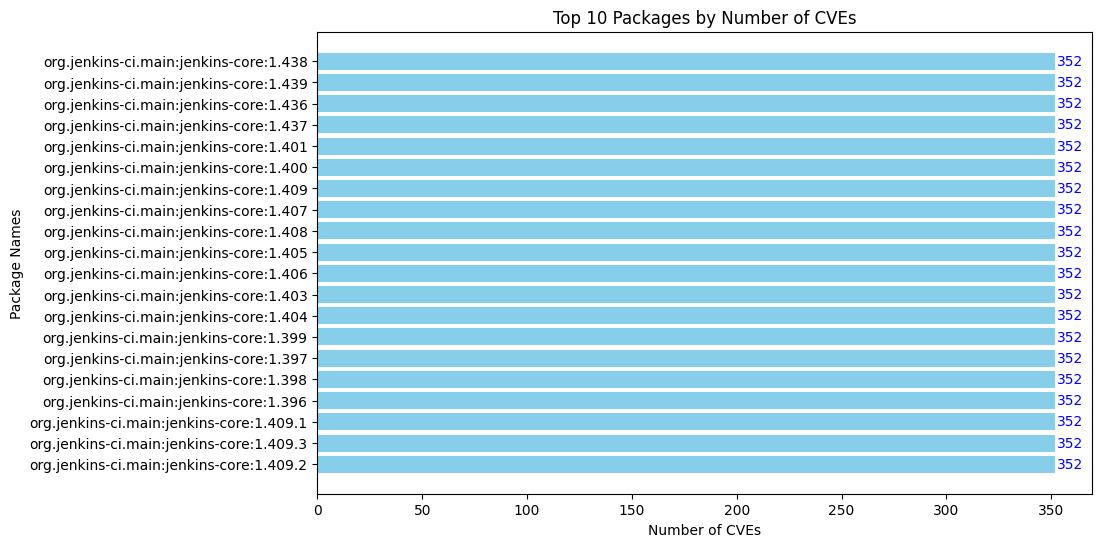

In [36]:
# Step 1: Extract the package names and the number of CVEs
packages = [pkg for pkg, count in most_common_packages]
counts = [count for pkg, count in most_common_packages]

# Step 2: Create a bar plot with package names on the x-axis and CVE counts on the y-axis
plt.figure(figsize=(10, 6))  # Adjust the size of the plot
plt.barh(packages, counts, color='skyblue')  # Use barh() to create a horizontal bar plot

# Step 3: Add titles and labels
plt.xlabel("Number of CVEs")
plt.ylabel("Package Names")
plt.title("Top 10 Packages by Number of CVEs")

# Display the values on the bars
for i, v in enumerate(counts):
    plt.text(v + 0.5, i, str(v), color='blue', va='center')

# Step 4: Show the plot
plt.show()

### Analyze the distribution of number of packages per CVE

In [26]:
# Assuming your dictionary is called `cve_dict`
cve_package_lengths = {cve: len(packages) for cve, packages in cve_pack_dict.items()}

# Optionally, convert it to a Pandas DataFrame for easier analysis
import pandas as pd

cve_df = pd.DataFrame(list(cve_package_lengths.items()), columns=['CVE', 'Package_Count'])

# Display the DataFrame
print(cve_df.head())

                            CVE  Package_Count
0                 CVE-2015-8103            584
1  BIT-elasticsearch-2023-46674            550
2                 CVE-2015-8031            688
3                CVE-2022-29546             76
4                CVE-2023-34055            408


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinationsimport matplotlib.pyplot as plt

# Assume your dictionary is called cve_dict

# Step 1: Calculate the length of each list of packages for each CVE
cve_package_lengths = {cve: len(packages) for cve, packages in cve_pack_dict.items()}

# Step 2: Sort the dictionary by the length of the package lists (descending order)
sorted_cve_lengths = sorted(cve_package_lengths.items(), key=lambda x: x[1], reverse=True)

# Step 3: Get the top 100 CVEs based on the length of their package lists
top_100_cves = sorted_cve_lengths[:100]

# Step 4: Visualize the distribution of the number of packages for the top 100 CVEs
top_100_lengths = [length for _, length in top_100_cves]

plt.bar(range(1, 101), top_100_lengths)
plt.title("Distribution of Number of Packages per CVE (Top 100 CVEs)")
plt.xlabel("CVE Rank (Top 100)")
plt.ylabel("Number of Packages")
plt.show()

4401


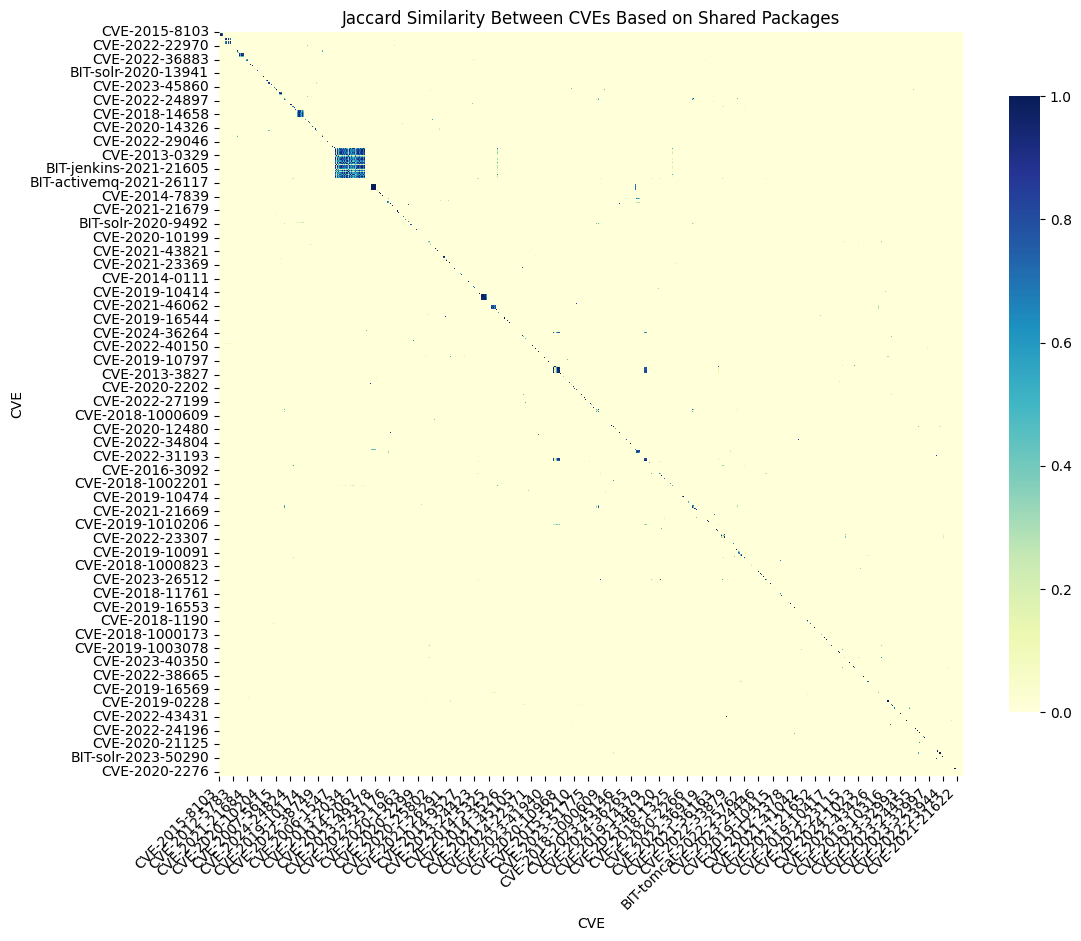

In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations

# Example: Calculate Jaccard similarity between CVEs
def jaccard_similarity(cve1, cve2, cve_dict):
    set1, set2 = set(cve_dict[cve1]), set(cve_dict[cve2])
    return len(set1 & set2) / len(set1 | set2)

print(len(cves))
# Create a list of CVEs
cves = list(cve_pack_dict.keys())  # Use the entire dictionary if it's manageable

# Initialize a matrix to hold the similarity scores
similarity_matrix = np.zeros((len(cves), len(cves)))

# Calculate similarities and fill the matrix
for i, cve1 in enumerate(cves):
    for j, cve2 in enumerate(cves):
        if i < j:  # Only calculate for pairs (to avoid duplicate calculations)
            similarity = jaccard_similarity(cve1, cve2, cve_pack_dict)
            similarity_matrix[i, j] = similarity
            similarity_matrix[j, i] = similarity  # Symmetric matrix

# Step 1: Create a DataFrame from the similarity matrix
similarity_df = pd.DataFrame(similarity_matrix, index=cves, columns=cves)

# Step 2: Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(similarity_df, cmap="YlGnBu", square=True, cbar_kws={"shrink": .8})
plt.title("Jaccard Similarity Between CVEs Based on Shared Packages")
plt.xlabel("CVE")
plt.ylabel("CVE")
plt.xticks(rotation=45, ha='right')  # Rotate x labels for better readability
plt.yticks(rotation=0)  # Keep y labels horizontal
plt.show()

In [ ]:
# Initialize a list to hold non-zero similarity pairs
non_zero_similarity_pairs = []

# Calculate similarities and store non-zero pairs
for cve1, cve2 in combinations(cves, 2):
    similarity = jaccard_similarity(cve1, cve2, cve_pack_dict)
    if similarity > 0:
        non_zero_similarity_pairs.append((cve1, cve2, similarity))

# Print out the pairs with non-zero similarity
for cve1, cve2, similarity in non_zero_similarity_pairs[:10]:
    print(f"CVE Pair: ({cve1}, {cve2}), Jaccard Similarity: {similarity:.4f}")